## Imports
```python
# Aqui, estamos importando todas as bibliotecas necessárias para o nosso projeto
import pandas # manipulação de dados
from sklearn.ensemble import RandomForestClassifier # Modelo utilizado
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report # Cálculo de métricas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Separação dos datasets

```python
# Aqui já temos o conjunto de teste e treino separados, agora vamos dividir o conjunto treino/validação

In [2]:
# Carregando os datasets de treino e teste
dataset_train = pd.read_csv("data/train_processed.csv")
dataset_test = pd.read_csv("data/test_processed.csv")

In [3]:
dataset_train.head(10)

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Arrival Delay in Minutes,Jovem,Adulto,Idoso,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,...,0.56250,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,...,0.18750,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,...,0.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,...,0.28125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,...,0.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5,0.232027,0.6,0.8,0.4,0.2,0.2,0.4,0.2,0.2,0.6,...,0.00000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,0.251414,0.4,0.8,0.4,0.6,0.4,0.4,0.4,0.4,0.6,...,0.71875,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7,0.404685,0.8,0.6,0.8,0.8,1.0,1.0,1.0,1.0,1.0,...,0.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.165994,0.2,0.4,0.4,0.4,0.8,0.6,0.6,0.2,0.2,...,0.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.207997,0.6,0.6,0.6,0.8,0.4,0.6,0.6,0.4,0.4,...,0.00000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [4]:
dataset_test.head(10)

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Arrival Delay in Minutes,Jovem,Adulto,Idoso,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.026050,1.0,0.8,0.6,0.8,0.6,0.8,0.6,1.0,1.0,...,1.37500,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.571890,0.2,0.2,0.6,0.2,1.0,0.8,1.0,0.8,0.8,...,0.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.032512,0.4,0.0,0.4,0.8,0.4,0.4,0.4,0.4,0.8,...,0.00000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.675687,0.0,0.0,0.0,0.4,0.6,0.8,0.8,0.2,0.2,...,0.18750,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.232431,0.4,0.6,0.8,0.6,0.8,0.2,0.4,0.4,0.4,...,0.62500,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.056543,0.6,0.6,0.6,0.6,1.0,1.0,0.6,1.0,0.8,...,0.00000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6,0.798869,1.0,1.0,1.0,1.0,0.6,1.0,1.0,1.0,1.0,...,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.509895,0.4,0.4,0.4,0.4,0.8,0.8,1.0,0.8,0.8,...,2.03125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.106018,1.0,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.4,...,0.00000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
9,0.345921,0.4,0.4,0.4,0.4,0.6,0.8,0.8,0.8,0.8,...,0.43750,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Treino + Validação 
```python
# 75% para treino, 25% para validação

In [5]:
# dropar labels
X_train = dataset_train.drop("satisfaction_satisfied",axis=1)
y_train = dataset_train["satisfaction_satisfied"]

# dividir
X_train, X_Val, y_train, y_Val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Verificando as dimensões dos dados de treino e validação

In [6]:
X_train.shape


(77928, 25)

In [7]:
X_Val.shape

(25976, 25)

```python
# apenas uma forma de visualizar a proporção

### Separando a target no teste também

```python
dataset_test.drop("satisfaction_satisfied",axis=1)

In [8]:
X_test = dataset_test.drop("satisfaction_satisfied",axis=1)
y_test = dataset_test["satisfaction_satisfied"]

y_test.head(10)

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: satisfaction_satisfied, dtype: float64

## Iniciando os trabalhos com a RandomForest
```python
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()

# Vamos utilizar GridSearch para encontrar um conjunto de hiperparâmetros interessante

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': list(range(100, 600, 100)),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 135 candidates, totalling 405 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

## "Score" do Grid_Search

```python
# Aqui iremos plotar qual foi o melhor conjunto de parâmetros para o GridSearch

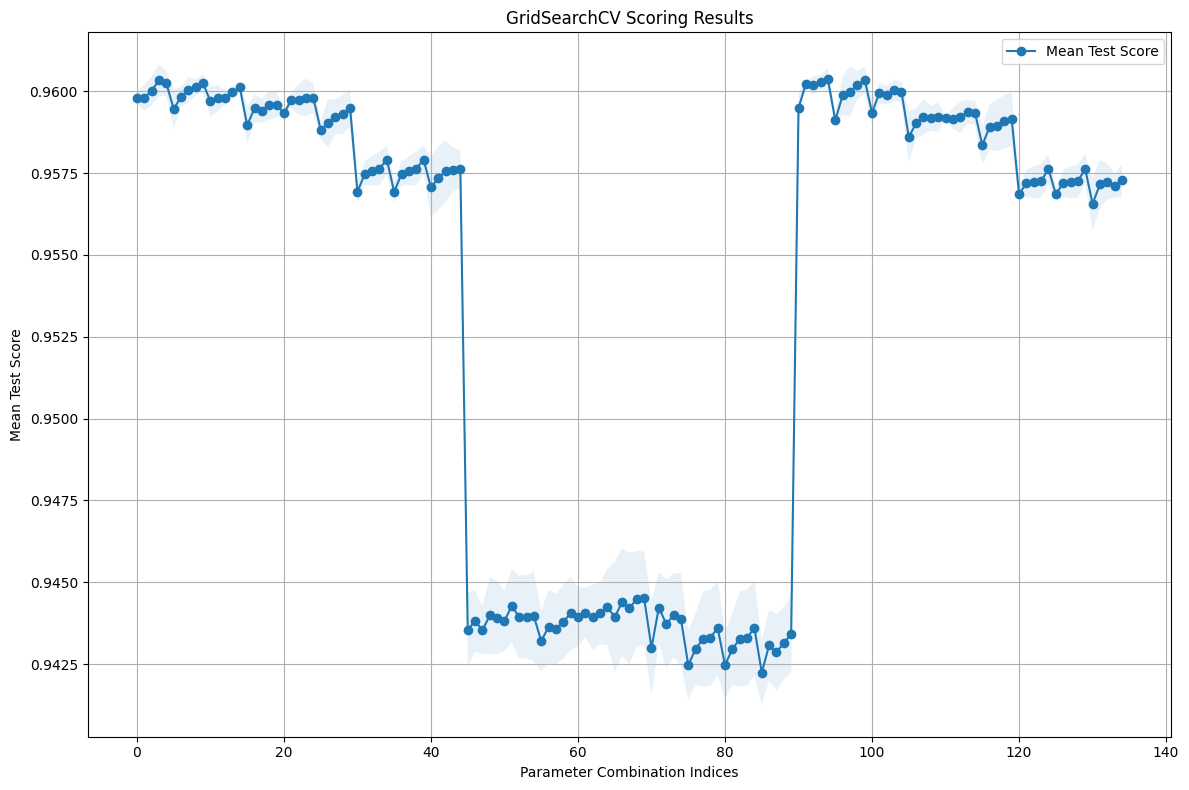

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Extract mean test scores
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Optional: Extract standard deviation of test scores
std_test_scores = grid_search.cv_results_['std_test_score']

# Generate indices for each parameter combination
indices = np.arange(len(grid_search.cv_results_['params']))

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(indices, mean_test_scores, marker='o', label='Mean Test Score')
plt.fill_between(indices, mean_test_scores - std_test_scores, mean_test_scores + std_test_scores, alpha=0.1)

plt.xlabel('Parameter Combination Indices')
plt.ylabel('Mean Test Score')
plt.title('GridSearchCV Scoring Results')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

In [11]:
print(f"parâmetro bom arbitrário: {grid_search.cv_results_['params'][10]}")

parâmetro bom arbitrário: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [12]:
print(f"parâmetro abaixo: {grid_search.cv_results_['params'][50]}")

parâmetro abaixo: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [13]:
print(f"parâmetro novamente bom arbitrário: {grid_search.cv_results_['params'][90]}")

parâmetro novamente bom arbitrário: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [14]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

#### Resultado

```python
# Utilizaremos então tal conjunto de hiperparâmetros para o teste nas métricas seguintes
best_rf_model = grid_search.best_estimator_

# Relatório de Classificação e matriz de confusão
```python
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
# Gerando um relatório de classificação para avaliar métricas como precisão, recall e F1-score.


Confusion Matrix:
[[0.97893364 0.02106636]
 [0.06165044 0.93834956]]


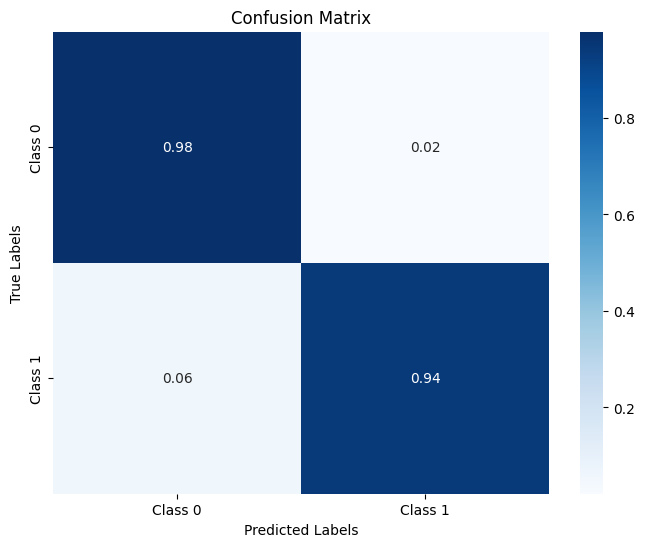

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Chamando o modelo com os melhores parâmetros
best_rf_model = RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
best_rf_model.fit(X_train, y_train)


y_pred = best_rf_model.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Confusion Matrix:")
print(cm)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     14573
         1.0       0.97      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



## Curva ROC
```python
from sklearn.metrics import roc_auc_score, roc_curve
# Plotando a curva ROC para avaliar a capacidade do modelo em distinguir entre as classes.

AUROC: 0.9931254389512357


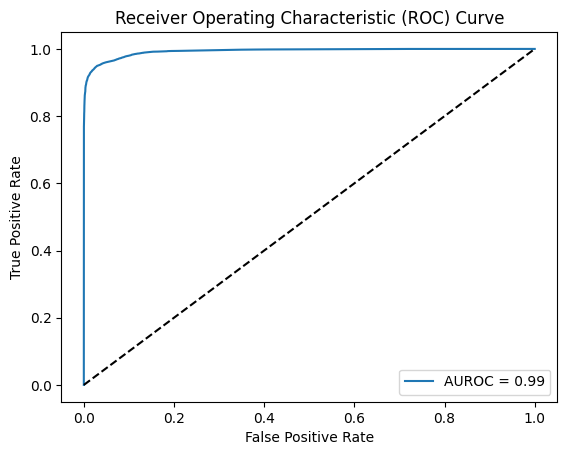

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve

y_probs = best_rf_model.predict_proba(X_test)[:, 1]

auroc = roc_auc_score(y_test, y_probs)
print(f'AUROC: {auroc}')

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUROC = {auroc:.2f}')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

```python
# A curva ROC apresenta um desempenho muito bom com uma área sob a curva (AUROC) de aproximadamente 0,99, indicando uma excelente capacidade de distinção entre as classes.

## Estatística KS e Função de Distribuição Acumulada (CDF)
```python

# Nesta seção, calculamos a estatística KS (Kolmogorov-Smirnov) para comparar a distribuição das previsões probabilísticas

Estatística KS: 0.9202929878185299
Valor p: 0.0


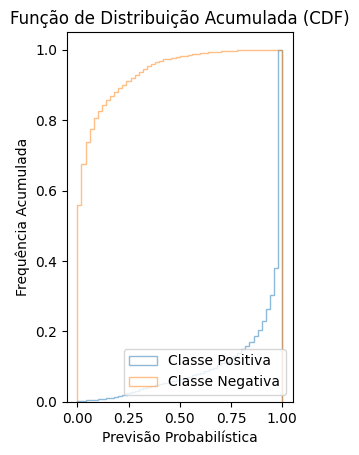

In [18]:
from scipy import stats

pred_pos = y_probs[y_test == 1]
pred_neg = y_probs[y_test == 0]

ks_statistic, p_value = stats.ks_2samp(pred_pos, pred_neg)
print(f'Estatística KS: {ks_statistic}')
print(f'Valor p: {p_value}')


plt.subplot(1, 2, 2)
plt.hist(pred_pos, bins=50, alpha=0.5, label='Classe Positiva', density=True, cumulative=True, histtype='step')
plt.hist(pred_neg, bins=50, alpha=0.5, label='Classe Negativa', density=True, cumulative=True, histtype='step')
plt.xlabel('Previsão Probabilística')
plt.ylabel('Frequência Acumulada')
plt.title('Função de Distribuição Acumulada (CDF)')
plt.legend(loc='lower right')

plt.show()

### Resultados
```python
# O gráfico da Função de Distribuição Acumulada (CDF) mostra uma diferença significativa entre as classes, com um valor da estatística KS de 0.92, demonstrando um ótimo resultado.